# Matplotlib
The main tool for plotting in python is called matplotlib. We can use it, in combination with numpy, scipy, and other libraries to create beautiful, publication quality images right in our jupyter notebooks. We will piece together a number of examples first using just numpy, but will work our way towards plotting scipy results, and eventually more data-centric stuff. The full documentation for matplotlib can be found [here](https://matplotlib.org/)

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

The main interface to matplotlib is via `pyplot` which wraps the matplotlib code into an interface that behaves like Matlab (a popular coding language/environment). Frankly, all of this is a bit opaque, but for much of what we will do we will work through the pyplot paradigm. 

Let's start by ploting the sine and cosine functions

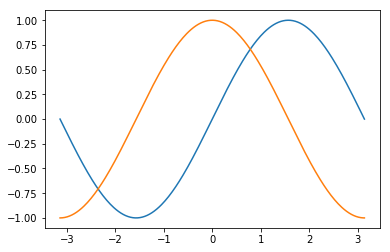

In [6]:
x = np.linspace(-np.pi,np.pi,256) #get an array of 256 evenly spaced values between -pi and pi
c = np.cos(x) # calculate cos(x)
s = np.sin(x) # calculate sin(x)

plt.plot(x,s) # create plot
plt.plot(x,c)
plt.show()  # show the plot

We can very simply change the color of the lines if we like, and their thickness, etc.

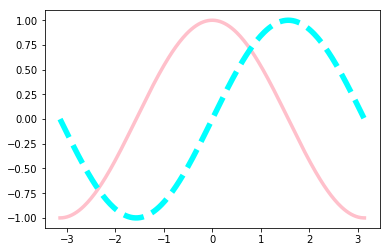

In [19]:
plt.plot(x, c, color="pink", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="cyan",  linewidth=5.5, linestyle="--")
plt.show()

Perhaps we are interested in limiting the range of the plot. We can do this using using the `xlim()` or `ylim()` functions which take as input a min and a max value for the limitation. Let's add a bit of space to our plot on the y-axis to make the curves a bit smaller in their framing (note we could of course do this on the x-axis too)

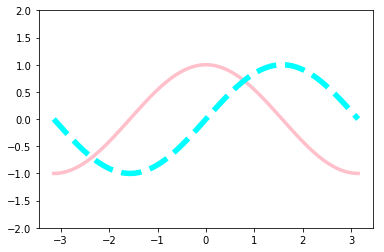

In [21]:
plt.plot(x, c, color="pink", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="cyan",  linewidth=5.5, linestyle="--")
plt.ylim(-2,2)
plt.show()

Matplotlib offers a TON of flexibility for our images. Let's add to this pretty x-tick labels that show coordinates in units of $\pi$. To do this we will rely upon matplotlib's built in `mathtext` mode which will render TeX like markup into pretty images. The full documentation for `mathtext` can be found [here](https://matplotlib.org/users/mathtext.html#mathtext-tutorial)

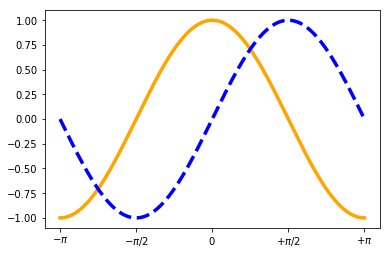

In [23]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format
plt.show()

Let's add a legend to the figure above

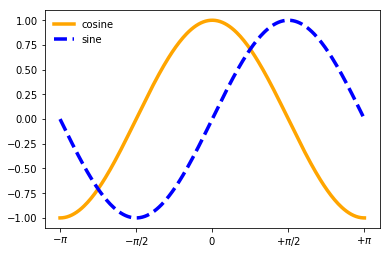

In [24]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-", label="cosine")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--", label="sine")
plt.legend(loc='upper left', frameon=False)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format
plt.show()

A neat thing that matplotlib will allow us to do is change the position of the "spines" of our plot, the lines that delineate the axes that we are plotting. Let's move the spines to positions that might be more familiar in the setting of a math class. You can read about spines [here](https://matplotlib.org/api/spines_api.html#matplotlib.spines)

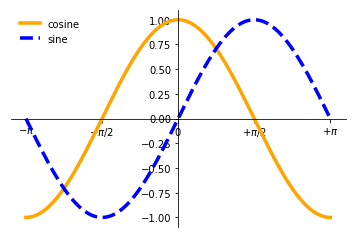

In [25]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-", label="cosine")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--", label="sine")
plt.legend(loc='upper left', frameon=False)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format

### move the spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

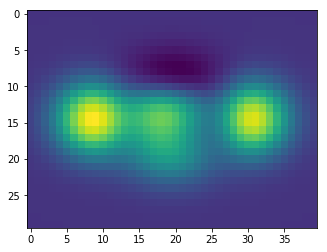

In [28]:
def f(x, y):
    return (1 - x / 2 + x ** 6 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))